In [1]:
from collections import defaultdict

In [2]:
vectors = {
    "A":(1,2),"B":(2,3),"C":(8,9),"D":(9,10),"E":(10,1)
}

In [4]:
def hash_function1(x):
    return 1 if x[0]<5 else 2

In [6]:
def hash_function2(x):
    return 1 if x[1]<5 else 2

In [7]:
def apply_hash(vector):
    buckets = defaultdict(list)
    for label, vector in vectors.items():
        bucket_id = (hash_function1(vector),hash_function2(vector))
        buckets[bucket_id].append(label)
    return buckets

In [9]:
hash_buckets = apply_hash(vector=vectors)

In [14]:
for bucket,grp in hash_buckets.items():
    print(bucket,"  ",grp)

(1, 1)    ['A', 'B']
(2, 2)    ['C', 'D']
(2, 1)    ['E']


In [15]:
import numpy as np
from sklearn.random_projection import SparseRandomProjection
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt


In [17]:
data = np.array([[1,0,1],[1,1,0],[0,1,1],[1,1,1],[0,0,1]])

In [18]:
lsh = SparseRandomProjection(n_components=2)

In [19]:
data_transformed = lsh.fit_transform(data)

In [20]:
cos_sim = cosine_similarity(data_transformed)

In [21]:
data_transformed

array([[ 1.86120972, -0.93060486],
       [ 1.86120972,  0.93060486],
       [ 1.86120972,  0.        ],
       [ 2.79181458,  0.        ],
       [ 0.93060486, -0.93060486]])

In [22]:
cos_sim

array([[1.        , 0.6       , 0.89442719, 0.89442719, 0.9486833 ],
       [0.6       , 1.        , 0.89442719, 0.89442719, 0.31622777],
       [0.89442719, 0.89442719, 1.        , 1.        , 0.70710678],
       [0.89442719, 0.89442719, 1.        , 1.        , 0.70710678],
       [0.9486833 , 0.31622777, 0.70710678, 0.70710678, 1.        ]])

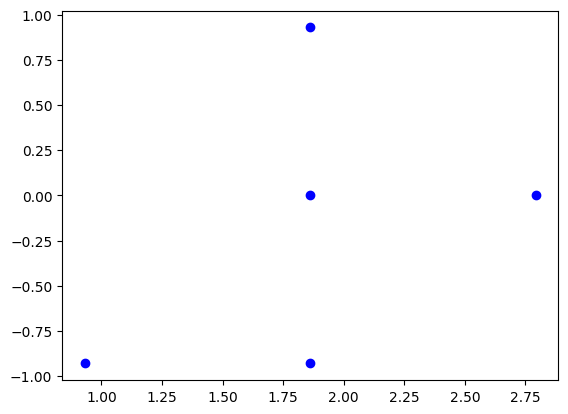

In [23]:
plt.scatter(data_transformed[:,0],data_transformed[:,1],color="b")

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import PCA

In [30]:
documents = [
    "The quick brown fox jumps over the lazy dog.",
    "Text preprocessing is an important step in NLP.",
    "This is a sample document for text processing.",
    "Natural Language Processing helps machines understand human language.",
    "Data cleaning and normalization are crucial in data science."
]


In [31]:
vectorizer = TfidfTransformer()

In [33]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [34]:
# Step 1: Convert the documents to a bag-of-words representation
count_vectorizer = CountVectorizer()
word_count_vector = count_vectorizer.fit_transform(documents)

# Step 2: Apply TF-IDF transformation
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(word_count_vector).toarray()

print(tfidf_matrix)

[[0.         0.         0.         0.30151134 0.         0.
  0.         0.         0.30151134 0.         0.30151134 0.
  0.         0.         0.         0.         0.30151134 0.
  0.30151134 0.         0.         0.         0.         0.30151134
  0.         0.         0.30151134 0.         0.         0.
  0.         0.60302269 0.         0.        ]
 [0.37924665 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.37924665 0.30597381 0.30597381 0.         0.
  0.         0.         0.         0.37924665 0.         0.
  0.37924665 0.         0.         0.         0.         0.37924665
  0.30597381 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.40986539 0.         0.40986539 0.         0.
  0.         0.         0.         0.33067681 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.33067681 0.         0.40986539 0.  